In [1]:
import librosa as lb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
y_approve_gustav , sr_approve_gustav = lb.load('/content/gustav_approve.m4a')
y_confirm_gustav , sr_confirm_gustav = lb.load('/content/gustav_confirm.m4a')
y_approve_michael , sr_approve_michael = lb.load('/content/michael_approve.m4a')
y_confirm_michael , sr_confirm_michael = lb.load('/content/michael_confirm.m4a')
y_approve_reine , sr_approve_reine = lb.load('/content/reine_approve.m4a')
y_confirm_reine , sr_confirm_reine = lb.load('/content/reine_confirm.m4a')

/tmp/ipython-input-2669451184.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y_approve_gustav , sr_approve_gustav = lb.load('/content/gustav_approve.m4a')
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-2669451184.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y_confirm_gustav , sr_confirm_gustav = lb.load('/content/gustav_confirm.m4a')
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-2669451184.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y_approve_micha

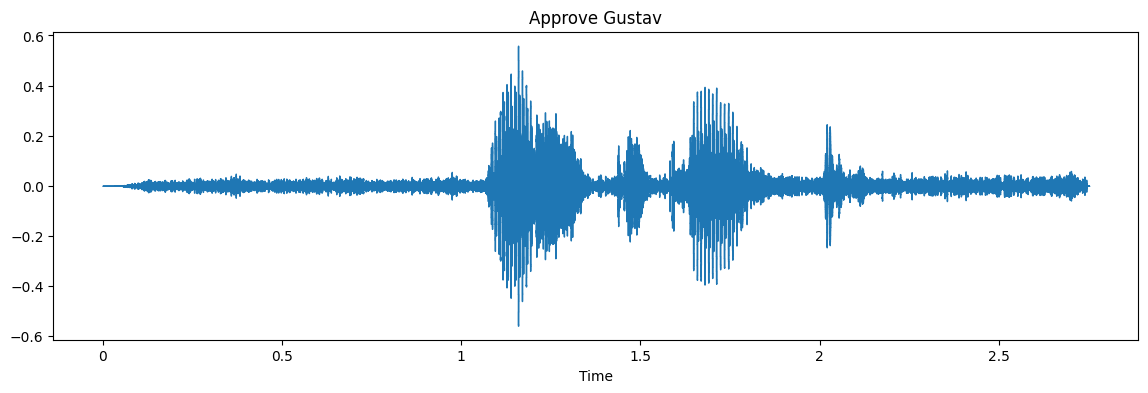

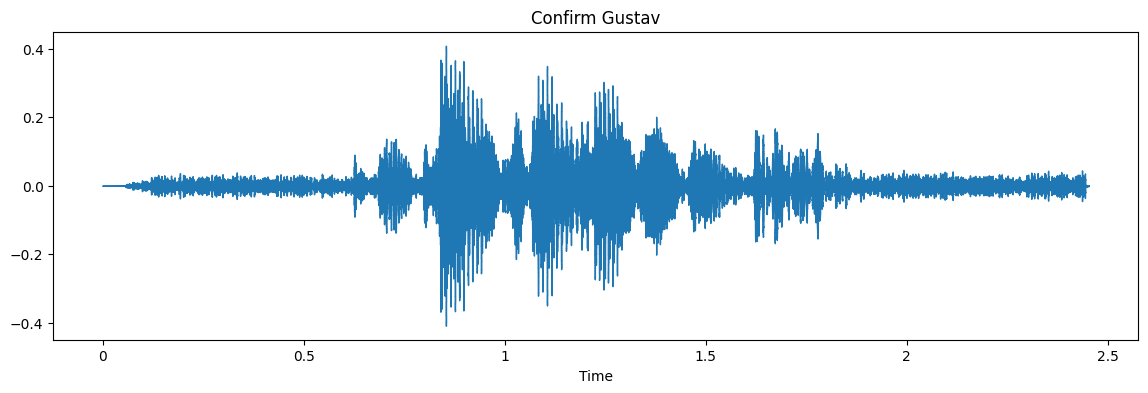

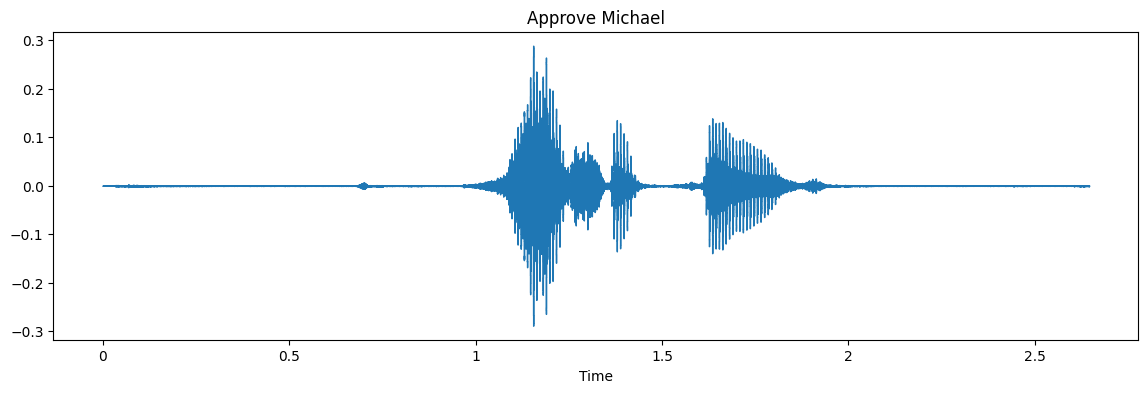

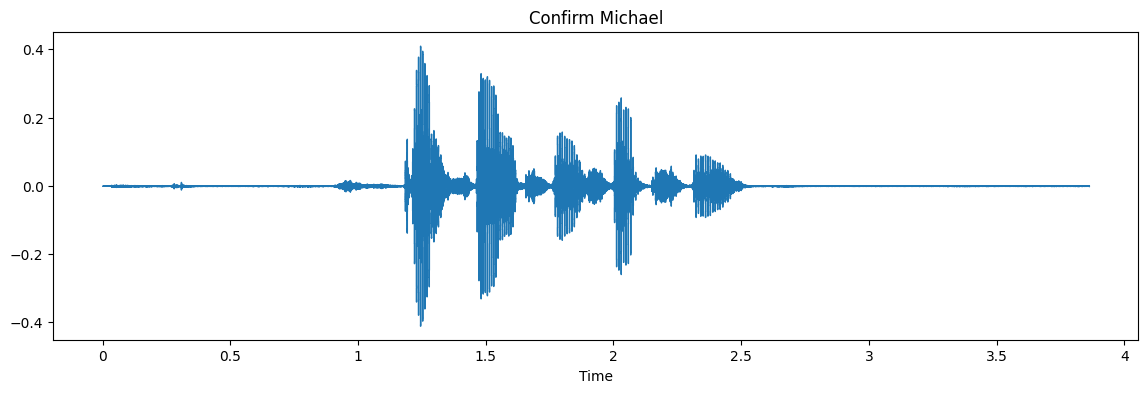

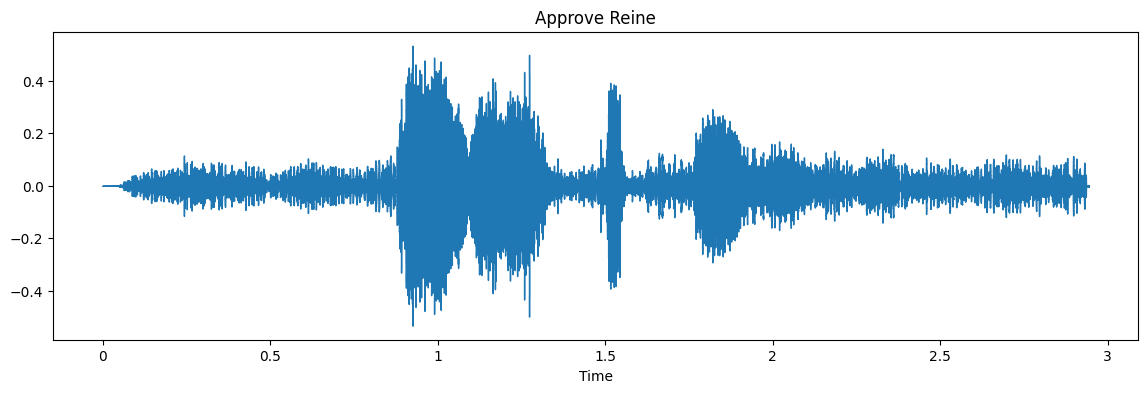

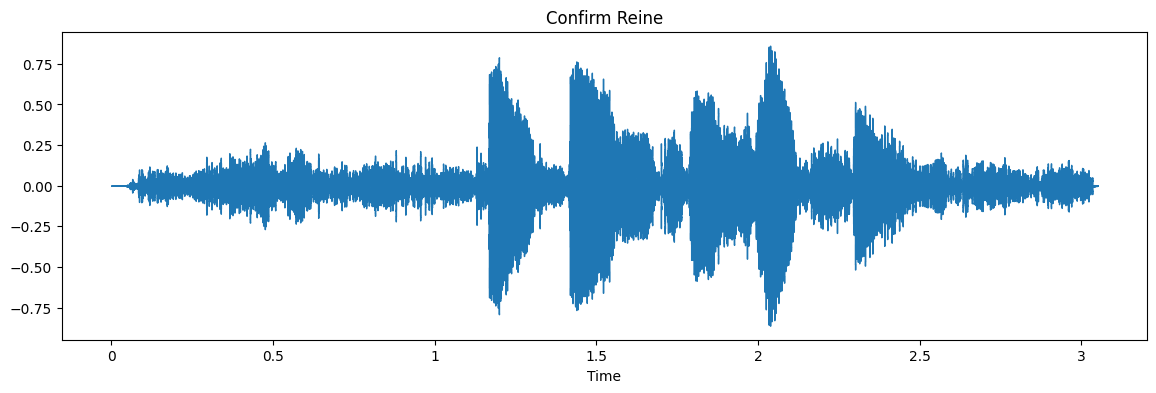

In [3]:
y_approve_gustav_sr = sr_approve_gustav
y_confirm_gustav_sr =  sr_confirm_gustav
y_approve_michael_sr = sr_approve_michael
y_confirm_michael_sr = sr_confirm_michael
y_approve_reine_sr = sr_approve_reine
y_confirm_reine_sr = sr_confirm_reine
waveforms = {
    'Approve Gustav': (y_approve_gustav, y_approve_gustav_sr),
    'Confirm Gustav': (y_confirm_gustav, y_confirm_gustav_sr),
    'Approve Michael': (y_approve_michael, y_approve_michael_sr),
    'Confirm Michael': (y_confirm_michael, y_confirm_michael_sr),
    'Approve Reine': (y_approve_reine, y_approve_reine_sr),
    'Confirm Reine': (y_confirm_reine, y_confirm_reine_sr)
}

# Loop through the waveforms and generate the plots
for title, (y, sr) in waveforms.items():
    plt.figure(figsize=(14, 4))
    lb.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.show()

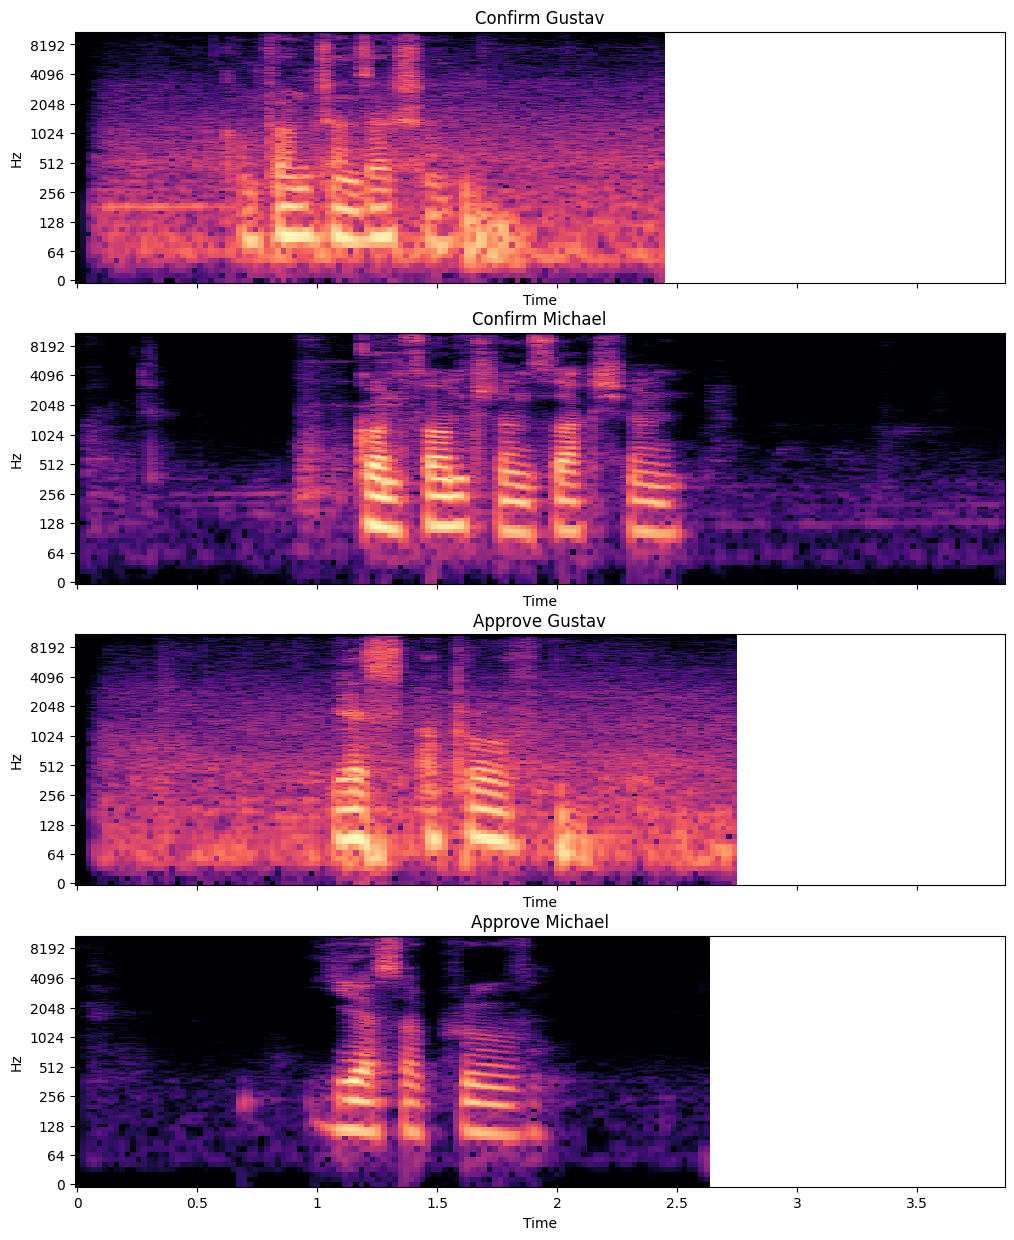

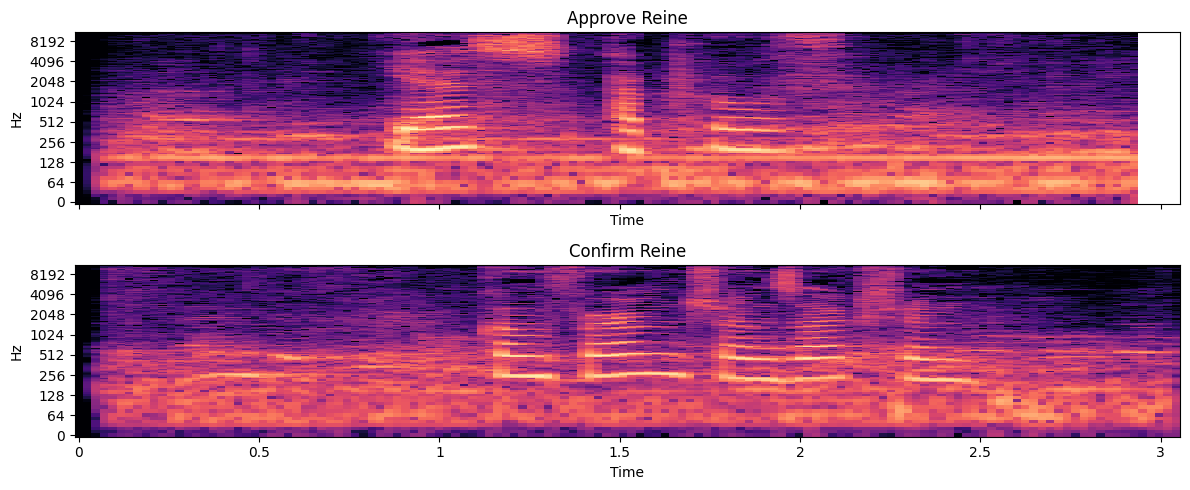

In [4]:
# Calculate STFT for the audio files
stft_approve_gustav = lb.stft(y_approve_gustav)
stft_confirm_gustav = lb.stft(y_confirm_gustav)
stft_approve_michael = lb.stft(y_approve_michael)
stft_confirm_michael = lb.stft(y_confirm_michael)
stft_approve_reine = lb.stft(y_approve_reine)
stft_confirm_reine = lb.stft(y_confirm_reine)

fig, ax = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(12, 15))

lb.display.specshow(lb.amplitude_to_db(np.abs(stft_confirm_gustav), ref=np.max), y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Confirm Gustav')

lb.display.specshow(lb.amplitude_to_db(np.abs(stft_confirm_michael), ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Confirm Michael')

lb.display.specshow(lb.amplitude_to_db(np.abs(stft_approve_gustav), ref=np.max), y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Approve Gustav')

lb.display.specshow(lb.amplitude_to_db(np.abs(stft_approve_michael), ref=np.max), y_axis='log', x_axis='time', ax=ax[3])
ax[3].set(title='Approve Michael')

# Create a new figure for Reine's spectrograms
fig_reine, ax_reine = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(12, 5))

lb.display.specshow(lb.amplitude_to_db(np.abs(stft_approve_reine), ref=np.max), y_axis='log', x_axis='time', ax=ax_reine[0])
ax_reine[0].set(title='Approve Reine')

lb.display.specshow(lb.amplitude_to_db(np.abs(stft_confirm_reine), ref=np.max), y_axis='log', x_axis='time', ax=ax_reine[1])
ax_reine[1].set(title='Confirm Reine')


plt.tight_layout()
plt.show()

In [5]:
# Trimming the audio to remove the silence
yt_confirm_gustav , index_confirm_gusatv = lb.effects.trim(y_confirm_gustav)
yt_approve_gustav , index_approve_gustav = lb.effects.trim(y_approve_gustav)
yt_confirm_michael , index_confirm_michael = lb.effects.trim(y_confirm_michael)
yt_approve_michael , index_approve_michael = lb.effects.trim(y_approve_michael)
yt_confirm_reine , index_confirm_reine = lb.effects.trim(y_confirm_reine)
yt_approve_reine , index_approve_reine = lb.effects.trim(y_approve_reine)
print(lb.get_duration(y=yt_confirm_gustav, sr=sr_confirm_gustav))
print(lb.get_duration(y=yt_approve_gustav, sr=sr_approve_gustav))
print(lb.get_duration(y=yt_confirm_michael, sr=sr_confirm_michael))
print(lb.get_duration(y=yt_approve_michael, sr=sr_approve_michael))
print(lb.get_duration(y=yt_confirm_reine, sr=sr_confirm_reine))
print(lb.get_duration(y=yt_approve_reine, sr=sr_approve_reine))
print('Before')
print(lb.get_duration(y=y_confirm_gustav, sr=sr_confirm_gustav))
print(lb.get_duration(y=y_approve_gustav, sr=sr_approve_gustav))
print(lb.get_duration(y=y_confirm_michael, sr=sr_confirm_michael))
print(lb.get_duration(y=y_approve_michael, sr=sr_approve_michael))
print(lb.get_duration(y=y_confirm_reine, sr=sr_confirm_reine))
print(lb.get_duration(y=y_approve_reine, sr=sr_approve_reine))

2.430113378684807
2.7287981859410433
3.8613605442176873
2.6453514739229025
3.027482993197279
2.920816326530612
Before
2.453333333333333
2.752018140589569
3.8613605442176873
2.6453514739229025
3.050702947845805
2.9440362811791383


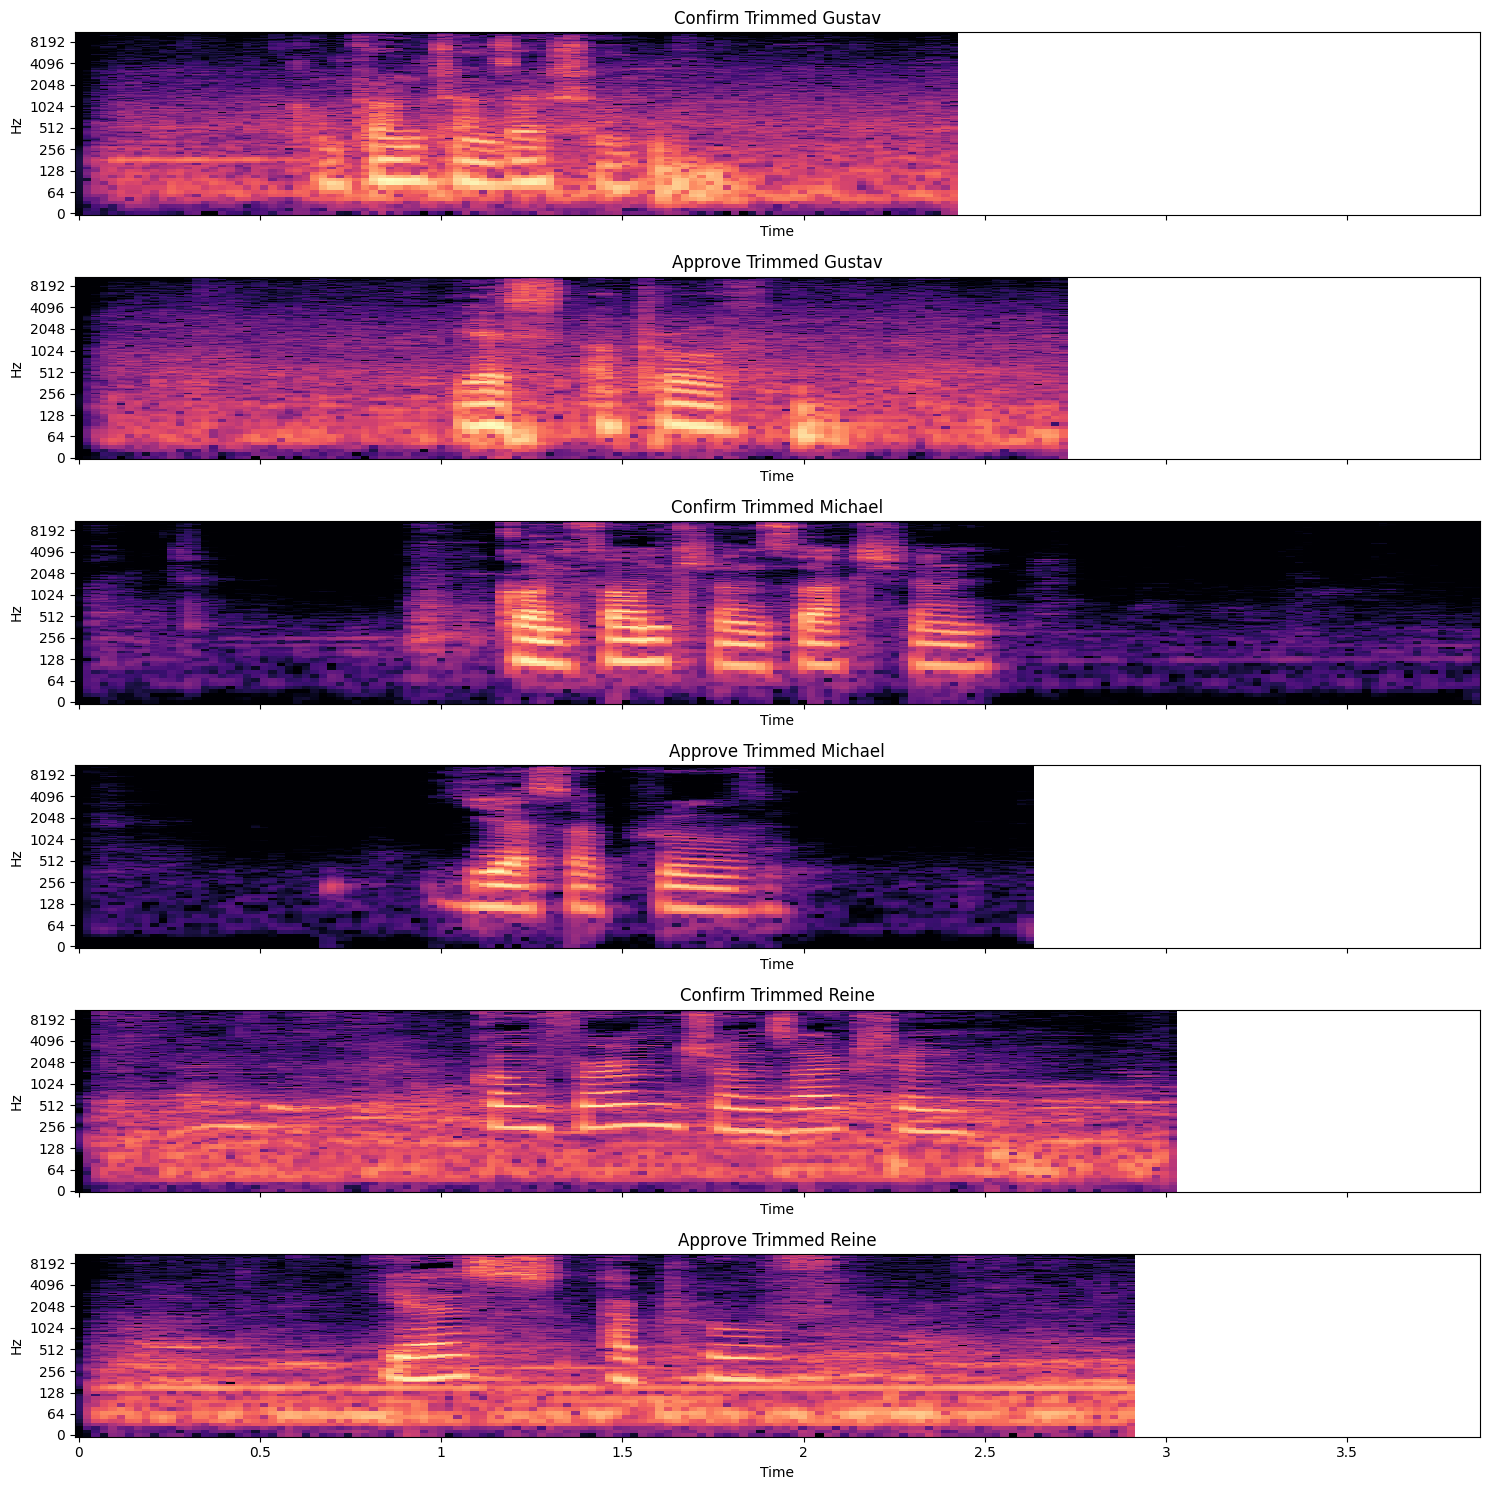

In [6]:
# Trimmed Spectograms
ts_confirm_gustav = lb.stft(yt_confirm_gustav)
ts_approve_gustav = lb.stft(yt_approve_gustav)
ts_confirm_michael = lb.stft(yt_confirm_michael)
ts_approve_michael = lb.stft(yt_approve_michael)
ts_confirm_reine = lb.stft(yt_confirm_reine)
ts_approve_reine = lb.stft(yt_approve_reine)
fig, ax = plt.subplots(nrows=6, sharex=True, sharey=True, figsize=(15, 15))

lb.display.specshow(lb.amplitude_to_db(np.abs(ts_confirm_gustav), ref=np.max),y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Confirm Trimmed Gustav')

lb.display.specshow(lb.amplitude_to_db(np.abs(ts_approve_gustav), ref=np.max),y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Approve Trimmed Gustav')

lb.display.specshow(lb.amplitude_to_db(np.abs(ts_confirm_michael), ref=np.max),y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Confirm Trimmed Michael')

lb.display.specshow(lb.amplitude_to_db(np.abs(ts_approve_michael), ref=np.max),y_axis='log', x_axis='time', ax=ax[3])
ax[3].set(title='Approve Trimmed Michael')

lb.display.specshow(lb.amplitude_to_db(np.abs(ts_confirm_reine), ref=np.max),y_axis='log', x_axis='time', ax=ax[4])
ax[4].set(title='Confirm Trimmed Reine')

lb.display.specshow(lb.amplitude_to_db(np.abs(ts_approve_reine), ref=np.max),y_axis='log', x_axis='time', ax=ax[5])
ax[5].set(title='Approve Trimmed Reine')

plt.tight_layout()
plt.show()

In [7]:
# Augmentation Pitch Shift
y_pitch_shift_confirm_gustav = lb.effects.pitch_shift(yt_confirm_gustav, sr=sr_confirm_gustav, n_steps=4)
y_pitch_shift_approve_gustav = lb.effects.pitch_shift(yt_approve_gustav,sr=sr_confirm_gustav, n_steps=4)
y_pitch_shift_confirm_michael = lb.effects.pitch_shift(yt_confirm_michael, sr=sr_confirm_michael, n_steps=4)
y_pitch_shift_approve_michael = lb.effects.pitch_shift(yt_approve_michael, sr=sr_approve_michael, n_steps=4)
y_pitch_shift_confirm_reine = lb.effects.pitch_shift(yt_confirm_reine, sr=sr_confirm_reine, n_steps=4)
y_pitch_shift_approve_reine = lb.effects.pitch_shift(yt_approve_reine, sr=sr_approve_reine, n_steps=4)

In [8]:
# Time Stretch
y_trimmed_stretched_confirm_gustav = lb.effects.time_stretch(yt_confirm_gustav, rate=0.8)
y_trimmed_stretched_approve_gustav = lb.effects.time_stretch(yt_approve_gustav, rate=0.8)
y_trimmed_stretched_confirm_michael = lb.effects.time_stretch(yt_confirm_michael, rate=0.8)
y_trimmed_stretched_approve_michael = lb.effects.time_stretch(yt_approve_michael, rate=0.8)
y_trimmed_stretched_confirm_reine = lb.effects.time_stretch(yt_confirm_reine, rate=0.8)
y_trimmed_stretched_approve_reine = lb.effects.time_stretch(yt_approve_reine, rate=0.8)

In [9]:


#Noisy data
# Confirm Gustave
noise_confirm_gustav = np.random.randn(len(yt_confirm_gustav))
y_trimmed_noisy_confirm_gustav = yt_confirm_gustav + 0.005 * noise_confirm_gustav
y_trimmed_noisy_confirm_gustav = np.clip(y_trimmed_noisy_confirm_gustav, -1.0, 1.0)

# Approve Gustave
noise_approve_gustav = np.random.randn(len(yt_approve_gustav))
y_trimmed_noisy_approve_gustav = yt_approve_gustav + 0.005 * noise_approve_gustav
y_trimmed_noisy_approve_gustav = np.clip(y_trimmed_noisy_approve_gustav, -1.0, 1.0)

# Confirm Michael
noise_confirm_michael = np.random.randn(len(yt_confirm_michael))
y_trimmed_noisy_confirm_michael = yt_confirm_michael + 0.005 * noise_confirm_michael
y_trimmed_noisy_confirm_michael = np.clip(y_trimmed_noisy_confirm_michael, -1.0, 1.0)

# Approve Michael
noise_approve_michael = np.random.randn(len(yt_approve_michael))
y_trimmed_noisy_approve_michael = yt_approve_michael + 0.005 * noise_approve_michael
y_trimmed_noisy_approve_michael = np.clip(y_trimmed_noisy_approve_michael, -1.0, 1.0)

# Confirm Reine
noise_confirm_reine = np.random.randn(len(yt_confirm_reine))
y_trimmed_noisy_confirm_reine = yt_confirm_reine + 0.005 * noise_confirm_reine
y_trimmed_noisy_confirm_reine = np.clip(y_trimmed_noisy_confirm_reine, -1.0, 1.0)

# Approve Reine
noise_approve_reine = np.random.randn(len(yt_approve_reine))
y_trimmed_noisy_approve_reine = yt_approve_reine + 0.005 * noise_approve_reine
y_trimmed_noisy_approve_reine = np.clip(y_trimmed_noisy_approve_reine, -1.0, 1.0)



In [10]:
augmentations = {
    'pitch_confirm_gustav': (y_pitch_shift_confirm_gustav, sr_confirm_gustav),
    'pitch_approve_gustav': (y_pitch_shift_approve_gustav, sr_approve_gustav),
    'pitch_confirm_michael': (y_pitch_shift_confirm_michael, sr_confirm_michael),
    'pitch_approve_michael': (y_pitch_shift_approve_michael, sr_approve_michael),
    'pitch_confirm_reine': (y_pitch_shift_confirm_reine, sr_confirm_reine),
    'pitch_approve_reine': (y_pitch_shift_approve_reine, sr_approve_reine),

    'stretch_confirm_gustav': (y_trimmed_stretched_confirm_gustav, sr_confirm_gustav),
    'stretch_approve_gustav': (y_trimmed_stretched_approve_gustav, sr_approve_gustav),
    'stretch_confirm_michael': (y_trimmed_stretched_confirm_michael, sr_confirm_michael),
    'stretch_approve_michael': (y_trimmed_stretched_approve_michael, sr_approve_michael),
    'stretch_confirm_reine': (y_trimmed_stretched_confirm_reine, sr_confirm_reine),
    'stretch_approve_reine': (y_trimmed_stretched_approve_reine, sr_approve_reine),

    'noise_confirm_gustav': (y_trimmed_noisy_confirm_gustav, sr_confirm_gustav),
    'noise_approve_gustav': (y_trimmed_noisy_approve_gustav, sr_approve_gustav),
    'noise_confirm_michael': (y_trimmed_noisy_confirm_michael, sr_confirm_michael),
    'noise_approve_michael': (y_trimmed_noisy_approve_michael, sr_approve_michael),
    'noise_confirm_reine': (y_trimmed_noisy_confirm_reine, sr_confirm_reine),
    'noise_approve_reine': (y_trimmed_noisy_approve_reine, sr_approve_reine),

}

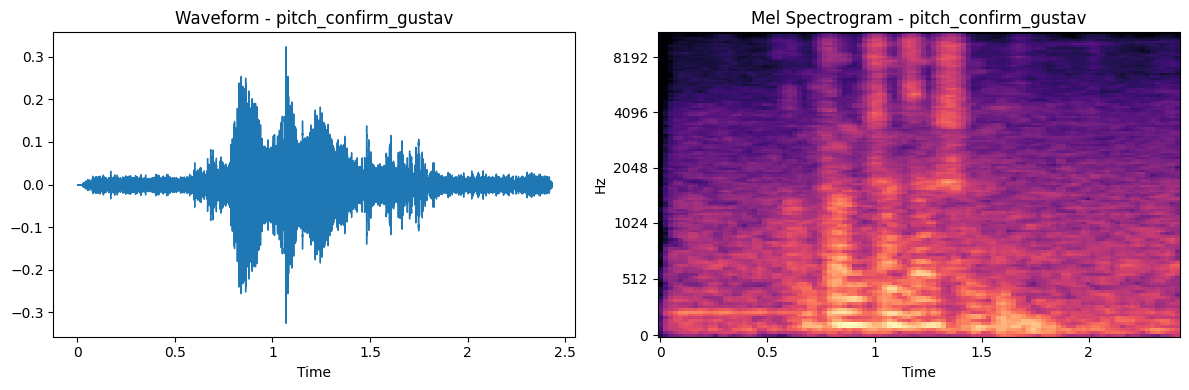

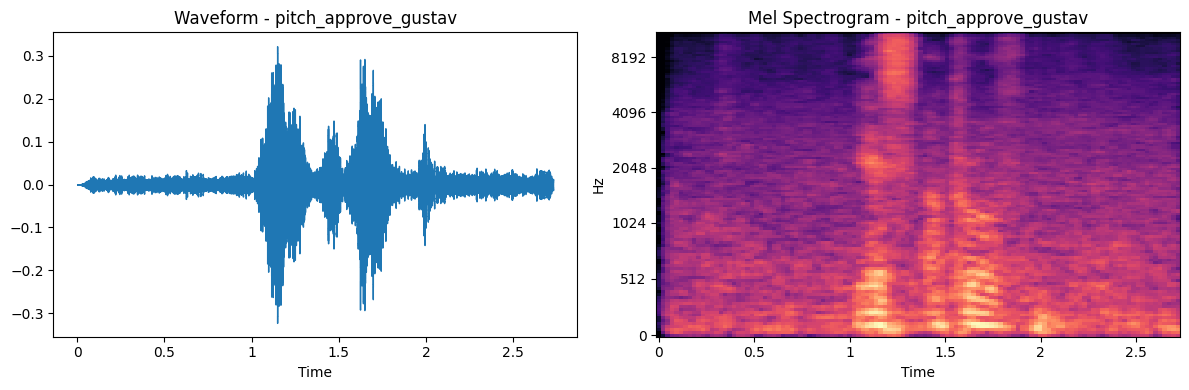

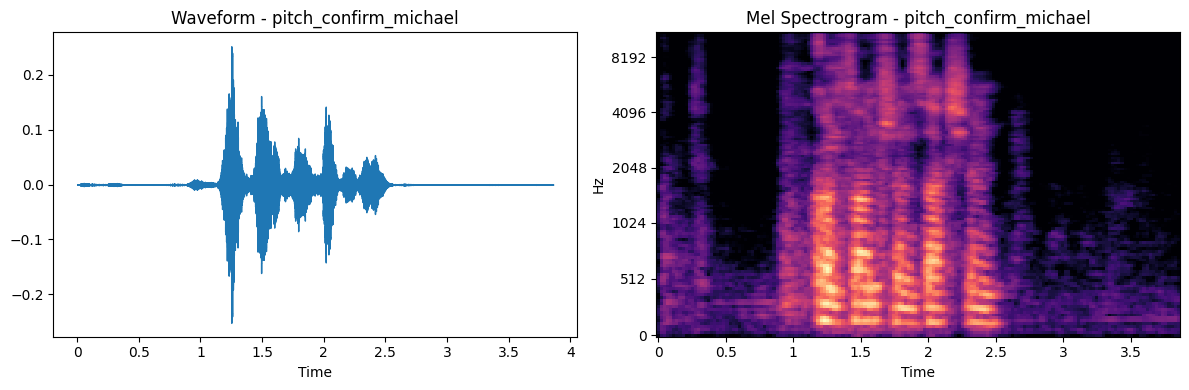

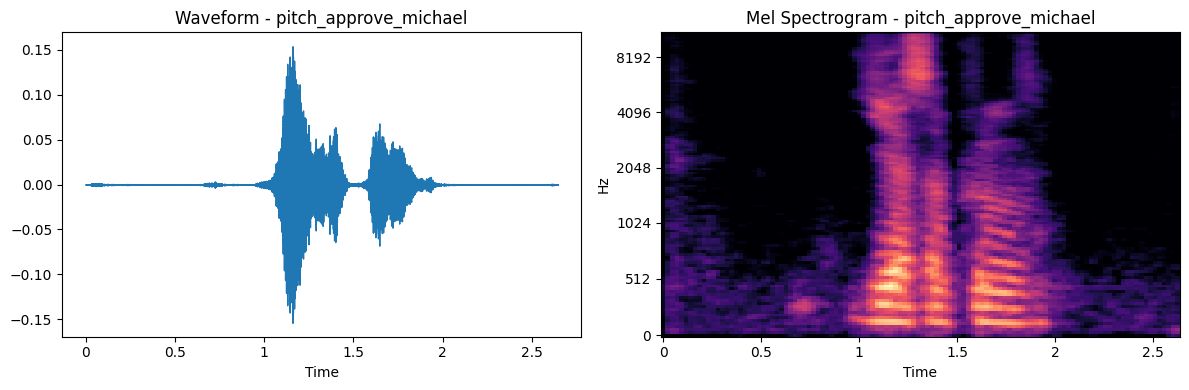

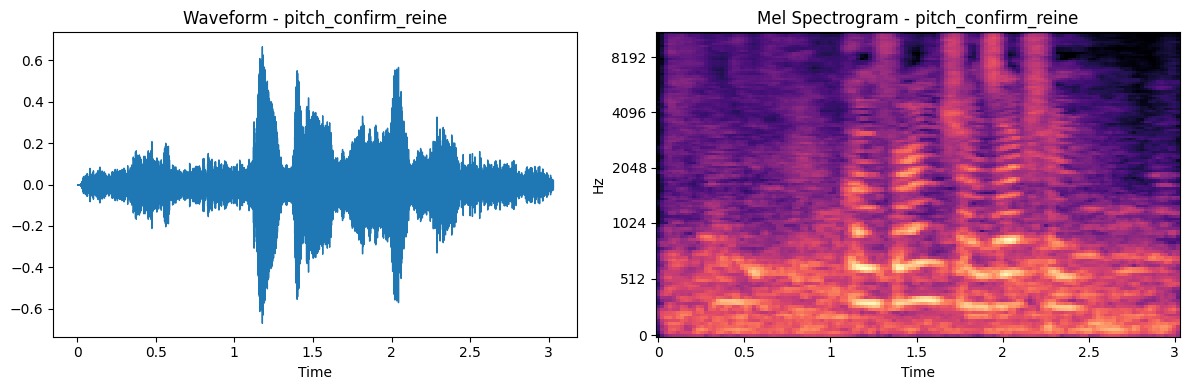

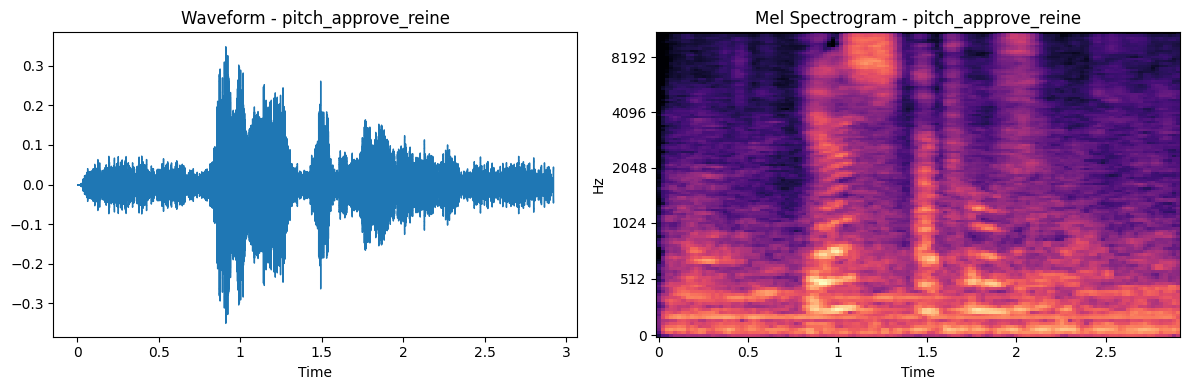

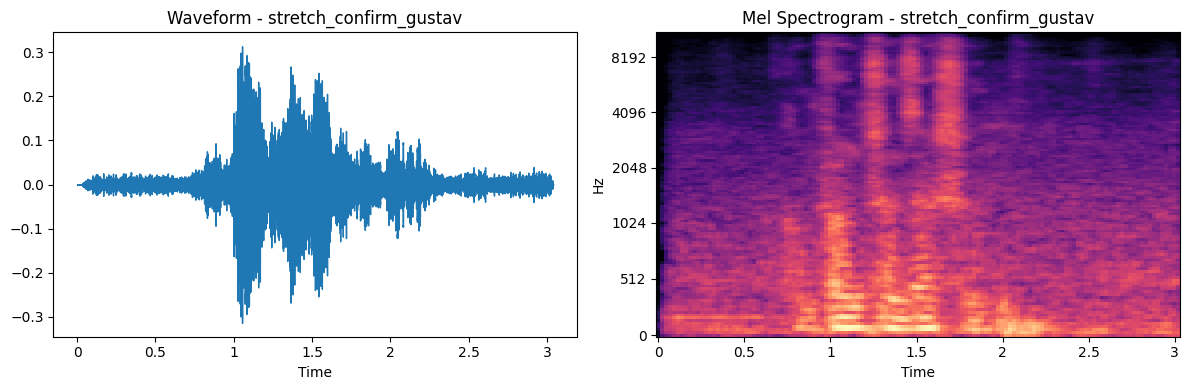

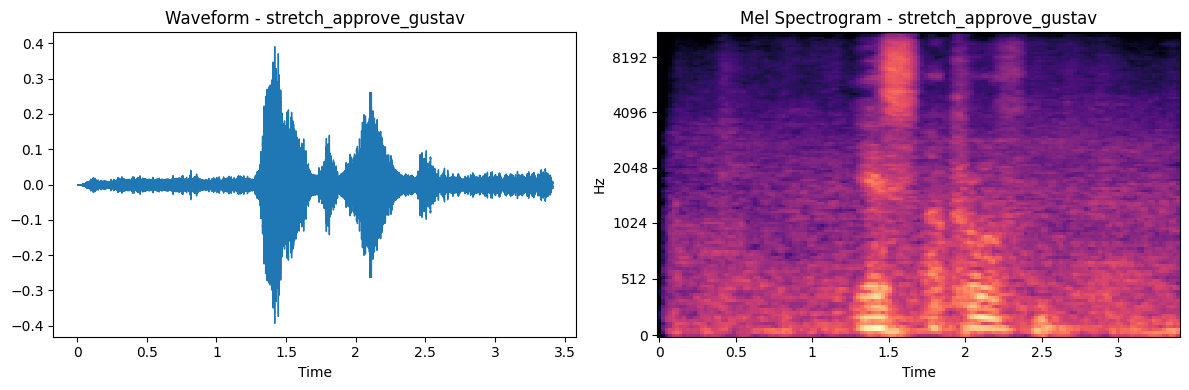

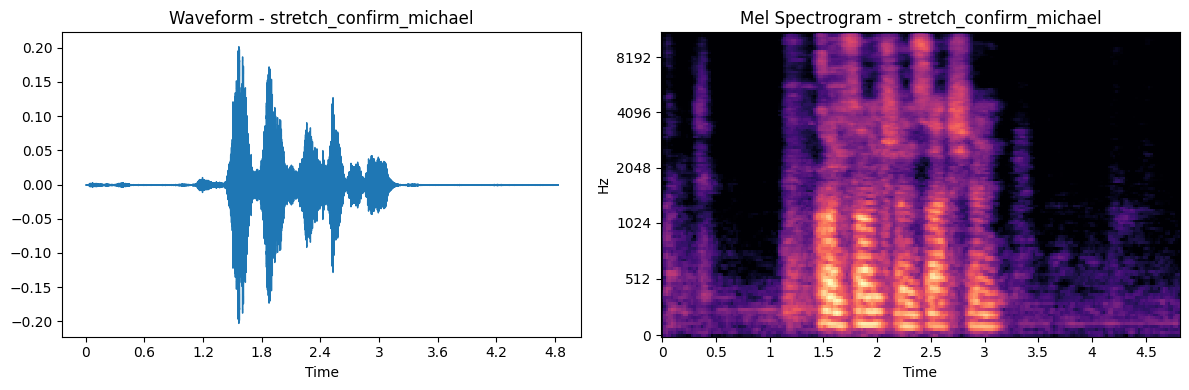

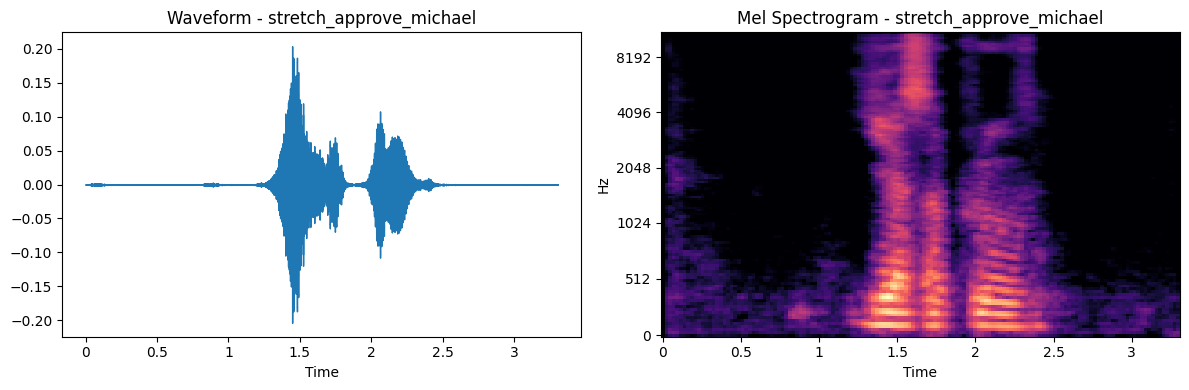

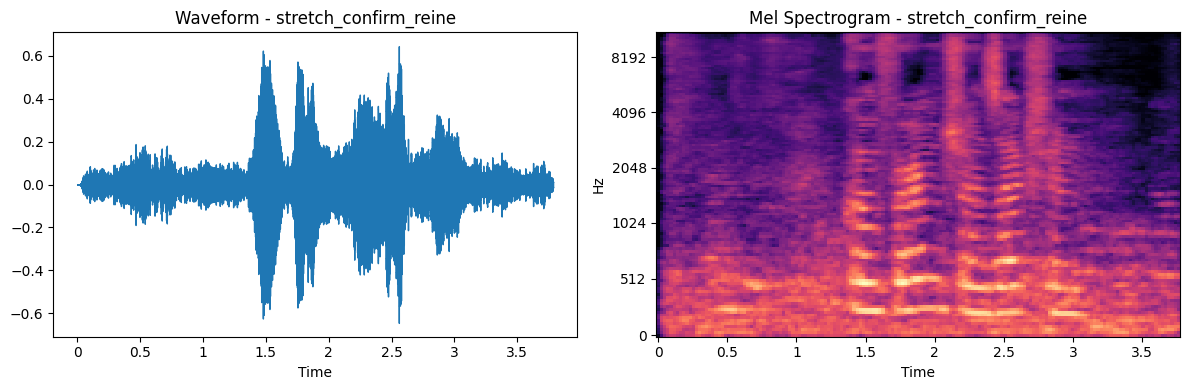

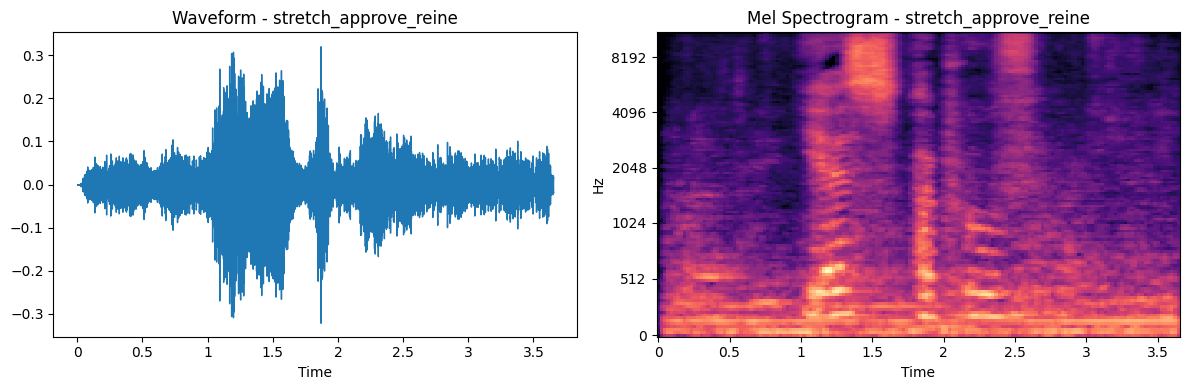

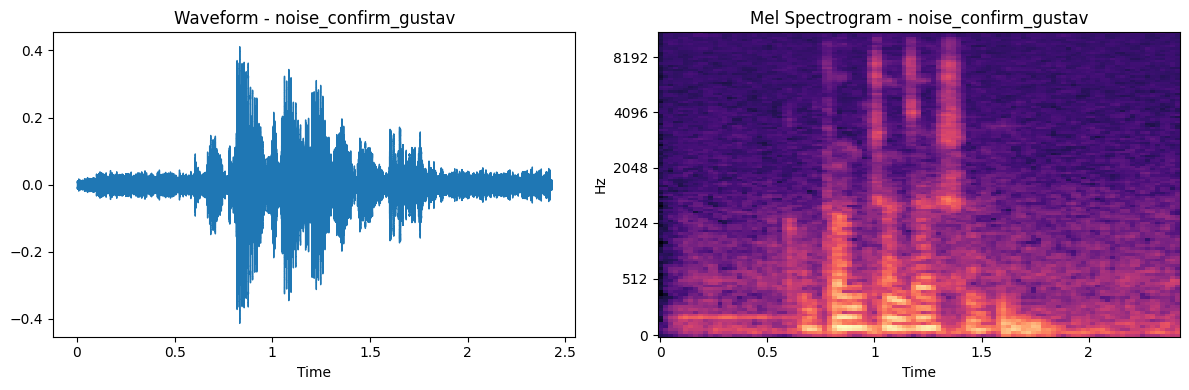

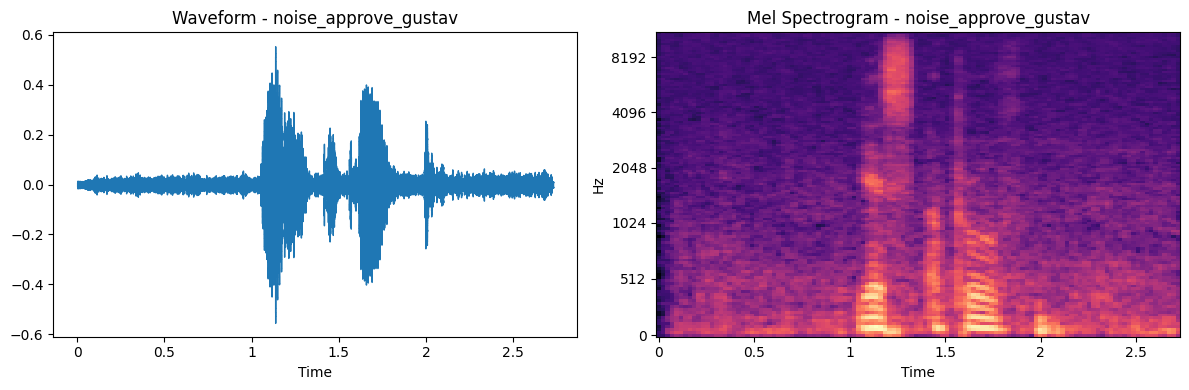

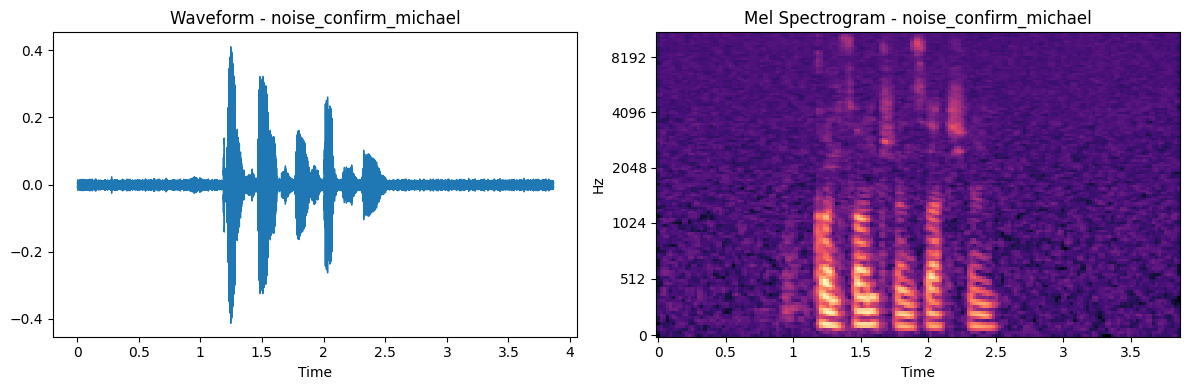

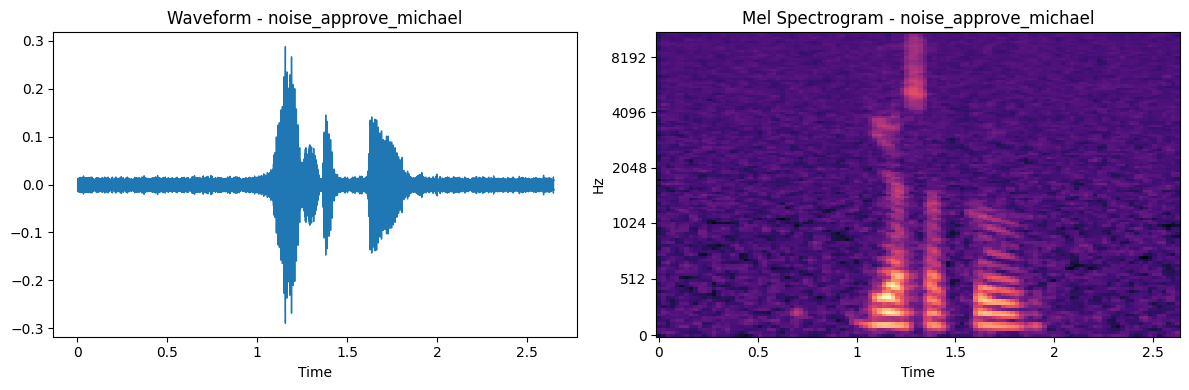

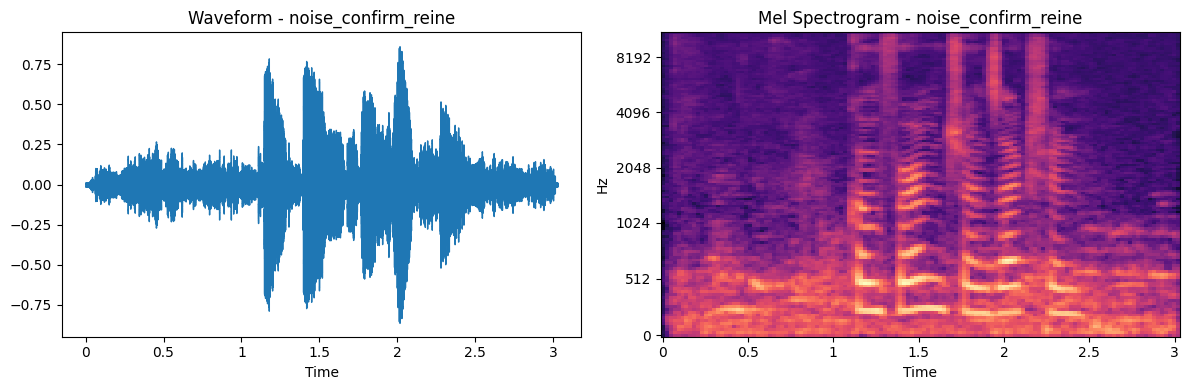

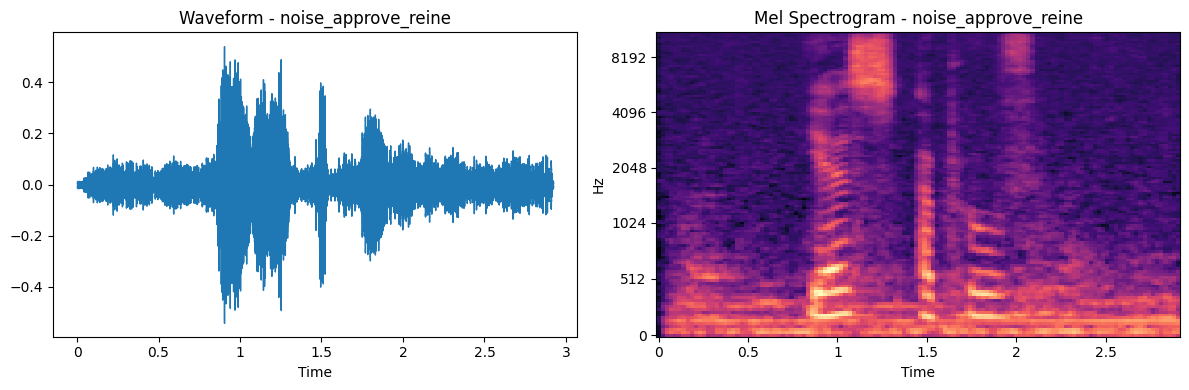

In [11]:

for label, (y, sr) in augmentations.items():
    plt.figure(figsize=(12, 4))

    # Waveform
    plt.subplot(1, 2, 1)
    lb.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {label}")

    # Spectrogram
    plt.subplot(1, 2, 2)
    S = lb.feature.melspectrogram(y=y, sr=sr)
    lb.display.specshow(lb.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.title(f"Mel Spectrogram - {label}")

    plt.tight_layout()
    plt.show()

In [12]:
def extract_features(y, sr):
    # MFCC
    mfcc = lb.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)

    # Delta and Delta-Delta MFCC
    mfcc_delta = lb.feature.delta(mfcc)
    mfcc_delta2 = lb.feature.delta(mfcc, order=2)
    mfcc_delta_mean = np.mean(mfcc_delta, axis=1)
    mfcc_delta2_mean = np.mean(mfcc_delta2, axis=1)

    # Spectral features
    rolloff = lb.feature.spectral_rolloff(y=y, sr=sr)
    centroid = lb.feature.spectral_centroid(y=y, sr=sr)
    bandwidth = lb.feature.spectral_bandwidth(y=y, sr=sr)
    contrast = lb.feature.spectral_contrast(y=y, sr=sr)
    flatness = lb.feature.spectral_flatness(y=y)

    # Energy and rhythm features
    rms = lb.feature.rms(y=y)
    zcr = lb.feature.zero_crossing_rate(y)

    # Fundamental frequency
    f0 = lb.yin(y, fmin=50, fmax=400)
    f0_clean = f0[f0 > 0]

    # Formant-like  LPC
    lpc_coeffs = lb.lpc(y, order=12)

    # Chroma features
    chromagram = lb.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chromagram, axis=1)

    # Onset strength
    onset_env = lb.onset.onset_strength(y=y, sr=sr)
    onset_mean = np.mean(onset_env)
    onset_std = np.std(onset_env)


    features = {
        'duration': lb.get_duration(y=y, sr=sr),

        **{f'mfcc_{i}_mean': mfcc_mean[i] for i in range(13)},
        **{f'mfcc_{i}_std': mfcc_std[i] for i in range(13)},

        **{f'mfcc_delta_{i}_mean': mfcc_delta_mean[i] for i in range(13)},
        **{f'mfcc_delta2_{i}_mean': mfcc_delta2_mean[i] for i in range(13)},

        'rolloff_mean': np.mean(rolloff),
        'rolloff_std': np.std(rolloff),
        'centroid_mean': np.mean(centroid),
        'centroid_std': np.std(centroid),
        'bandwidth_mean': np.mean(bandwidth),
        'bandwidth_std': np.std(bandwidth),
        'contrast_mean': np.mean(contrast),
        'contrast_std': np.std(contrast),
        'flatness_mean': np.mean(flatness),
        'flatness_std': np.std(flatness),

        # Energy features
        'rms_mean': np.mean(rms),
        'rms_std': np.std(rms),
        'zcr_mean': np.mean(zcr),
        'zcr_std': np.std(zcr),

        # Pitch features
        'f0_mean': np.mean(f0_clean) if len(f0_clean) > 0 else 0,
        'f0_std': np.std(f0_clean) if len(f0_clean) > 0 else 0,
        'f0_min': np.min(f0_clean) if len(f0_clean) > 0 else 0,
        'f0_max': np.max(f0_clean) if len(f0_clean) > 0 else 0,

        # LPC coefficients
        **{f'lpc_{i}': lpc_coeffs[i] for i in range(min(12, len(lpc_coeffs)))},

        # Chroma features
        **{f'chroma_{i}_mean': chroma_mean[i] for i in range(12)},

        # Temporal features
        'onset_mean': onset_mean,
        'onset_std': onset_std,
    }

    return features

In [13]:
features_confirm_gustav = extract_features(yt_confirm_gustav, sr_confirm_gustav)
features_approve_gustav = extract_features(yt_approve_gustav, sr_approve_gustav)
features_confirm_michael = extract_features(yt_confirm_michael, sr_confirm_michael)
features_approve_michael = extract_features(yt_approve_michael, sr_approve_michael)
features_confirm_reine = extract_features(yt_confirm_reine, sr_confirm_reine)
features_approve_reine = extract_features(yt_approve_reine, sr_approve_reine)

In [14]:
all_features = []
labels = ['confirm-transaction_gustav', 'approve-transaction_gustav','confirm-transaction_michael','approve-transaction_michael','confirm-transaction_reine', 'approve-transaction_reine',]
feature_sets = [features_confirm_gustav, features_approve_gustav,features_confirm_michael,features_approve_michael,features_confirm_reine ,features_approve_reine]

for label, features in zip(labels, feature_sets):
    row = {'file': label, 'speaker': label.split('_')[1], 'command': label.split('_')[0].replace('-', ' ')}
    row.update(features)
    all_features.append(row)

df = pd.DataFrame(all_features)
df.to_csv('audio_features.csv', index=False)